<a href="https://colab.research.google.com/github/mendiang/IYKRA-Data-Science-Fellowship-Batch-6/blob/main/EDA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice Case - Statistics
####Imam Mukhri
####Data Fellowship Batch 6 IYKRA

#Import Library & Function


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Function to find column name with specific string
def get_column_with_string(text):
    array = epl_data.columns.str.contains(text)
    column_index = np.where(array==True)
    return epl_data.columns[column_index]

#Load Dataset

In [3]:
url = 'https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv'
epl_data = pd.read_csv(url)

In [4]:
epl_data.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


In [5]:
epl_data.tail()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
15,Southampton,No UEFA Competitions,16,10,104302937,38,9,12,17,45,65,-20,39,28,28.0,22,160072000,5720000,"14,297",35,"2,394","2,040",664,193,483,162,4,4,31,14,71,3,1,3,114,153,548,699,4,"1,068",502,3,45.4,74.0
16,Brighton,No UEFA Competitions,17,13,105741728,38,9,9,20,35,60,-25,36,23,28.4,16,152680000,6635200,"14,109",15,"2,623","2,072",636,156,371,108,10,5,34,1,60,4,4,0,111,170,463,681,4,921,499,10,44.1,74.8
17,Cardiff,Relegated,18,12,102704107,38,10,4,24,34,69,-35,34,25,29.7,10,152020000,6080800,"10,226",39,"2,513","1,418",562,168,417,126,4,3,29,5,66,1,0,0,141,147,528,655,4,978,448,8,39.1,63.9
18,Fulham,Relegated,19,13,101904692,38,7,5,26,34,81,-47,26,25,26.7,18,106920000,4276800,"17,699",33,"2,417","2,750",611,161,454,146,7,2,30,4,68,2,2,0,147,144,433,591,0,971,443,7,49.2,80.3
19,Huddersfield,Relegated,20,10,96628865,38,3,7,28,22,76,-54,16,28,28.5,27,85492000,3053600,"15,902",23,"2,603","2,492",769,162,400,118,8,1,17,5,55,4,1,1,114,130,530,710,2,658,246,8,47.1,75.8


In [6]:
#The number of row & column epl data
epl_data.shape

(20, 44)

In [7]:
epl_data.columns

Index(['Team', 'category', 'general_league_position',
       'finance _live_games_televised', 'finance _tv_revenue',
       'general_matches_played', 'general_won', 'general_draw', 'general_lost',
       'attack_scored', 'defence_goals_conceeded', 'general_goal_difference',
       'general_points', 'general_squad_size', 'general_squad_average_age',
       'general_squad_foreigners', 'finance _team_market',
       'finance _market_average', 'attack_passes', 'attack_passes_through',
       'attack_passes_long', 'attack_passes_back', 'attack_crosses',
       'attack_corners_taken', 'attack_shots', 'attack_shots_on_target',
       'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box',
       'attack_goals_outsidebox', 'general_card_yellow', 'general_card_red',
       'attack_goals_counter', 'attack_goals_freekick', 'defence_saves',
       'defence_blocks', 'defence_interceptions', 'defence_tackles',
       'defence_tackles_last_man', 'defence_clearances',
       'defence_cleara

In [8]:
epl_data.nunique()

Team                             20
category                          6
general_league_position          20
finance _live_games_televised    12
finance _tv_revenue              20
general_matches_played            1
general_won                      15
general_draw                      8
general_lost                     13
attack_scored                    16
defence_goals_conceeded          17
general_goal_difference          20
general_points                   18
general_squad_size                7
general_squad_average_age        16
general_squad_foreigners         12
finance _team_market             20
finance _market_average          20
attack_passes                    20
attack_passes_through            19
attack_passes_long               20
attack_passes_back               20
attack_crosses                   20
attack_corners_taken             19
attack_shots                     19
attack_shots_on_target           19
attack_goals_headed              11
attack_goals_penalty        

#Question Number 1
####Is this data clean?





In [9]:
#Cleaning the missing values
epl_data.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

In [10]:
#Check data type of column
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [11]:
#Convert unappropriate column data type
epl_data = epl_data.astype({"finance _market_average": float})
epl_data['attack_passes'] = epl_data['attack_passes'].replace({',' : ''}, regex=True).astype('int64')
epl_data['attack_passes_long'] = epl_data['attack_passes_long'].replace({',' : ''}, regex=True).astype('int64')
epl_data['attack_passes_back'] = epl_data['attack_passes_back'].replace({',' : ''}, regex=True).astype('int64')
epl_data['defence_clearances'] = epl_data['defence_clearances'].replace({',' : ''}, regex=True).astype('int64')

In [12]:
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

#Question Number 2
####How is the point distribution of the epl team? and which team is an anomaly?

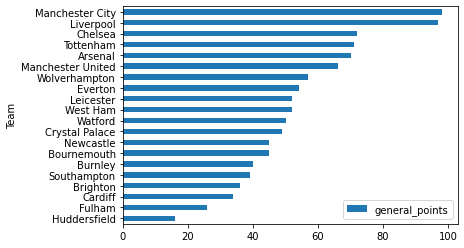

In [13]:
#Identify general point distribution based on bar chart
epl_data.plot.barh(x='Team',y='general_points').invert_yaxis()

In [14]:
#Check data summary of general point distribution
epl_data['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

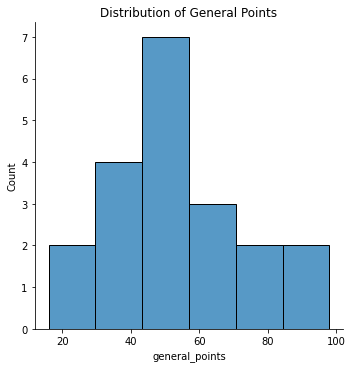

In [15]:
#Check point distribution with the histogram
sns.displot(epl_data, x='general_points')
plt.title("Distribution of General Points")
sns.despine()

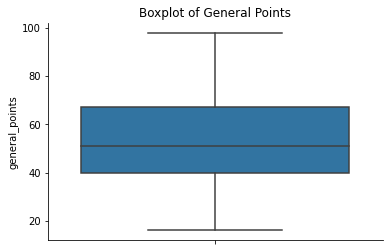

In [16]:
sns.boxplot(y='general_points', data=epl_data)
plt.title("Boxplot of General Points")
sns.despine()

#Question Number 3
####Which team has the best attack?

In [17]:
#Select the features related to the attack of team
# Create scaler object
scaler = MinMaxScaler()

# Get column containing 'attack' string
attack_columns = get_column_with_string("attack")

# Create new dataframe containing team names and attack columns
attack_data = epl_data[['Team']]
attack_data = pd.concat([attack_data,pd.DataFrame(scaler.fit_transform(epl_data[attack_columns]),
                                              columns=attack_columns)],axis=1)
attack_data.head()

,Team,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,Manchester City,1.000000,1.000000,0.740458,0.035587,1.000000,0.876984,1.000000,1.000000,1.000000,0.533333,0.222222,0.940299,1.000000,0.555556,0.666667,1.000000,1.000000
1,Liverpool,0.917808,0.820055,0.633588,0.423488,0.708009,0.630952,0.689873,0.665635,0.776316,1.000000,0.666667,1.000000,0.285714,0.666667,0.333333,0.791165,0.816733
2,Chelsea,0.561644,0.907612,1.000000,0.000000,0.870305,0.515873,0.474684,0.764706,0.592105,0.266667,0.444444,0.552239,0.571429,0.111111,0.333333,0.835341,0.944223
3,Tottenham,0.616438,0.676796,0.549618,0.438612,0.628278,0.321429,0.341772,0.547988,0.532895,0.666667,0.333333,0.537313,0.928571,0.555556,0.666667,0.706827,0.768924
4,Arsenal,0.698630,0.646836,0.381679,0.256228,0.596740,0.170635,0.436709,0.331269,0.407895,0.066667,0.333333,0.671642,0.714286,0.333333,1.000000,0.682731,0.772908


In [18]:
#Check correlation analysis in order to identify variables correlation.
attack_data.corr()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
attack_scored,1.000000,0.817732,0.725372,-0.692815,0.764238,0.203544,0.859992,0.804922,0.889678,0.396272,0.354105,0.977570,0.573268,0.454484,0.359218,0.849823,0.751870
attack_passes,0.817732,1.000000,0.824348,-0.756387,0.986540,0.336950,0.778956,0.863581,0.844993,0.321640,0.214261,0.780969,0.536665,0.339286,0.353208,0.987926,0.958513
attack_passes_through,0.725372,0.824348,1.000000,-0.719131,0.800251,0.333154,0.692783,0.817177,0.777863,0.319733,0.206044,0.705298,0.424755,0.314547,0.287656,0.813384,0.741452
attack_passes_long,-0.692815,-0.756387,-0.719131,1.000000,-0.711326,-0.066151,-0.736721,-0.771446,-0.737761,0.038654,-0.414866,-0.614405,-0.640159,-0.387463,-0.281401,-0.769474,-0.759779
attack_passes_back,0.764238,0.986540,0.800251,-0.711326,1.000000,0.370631,0.748911,0.841247,0.789096,0.320649,0.110160,0.727225,0.510180,0.287276,0.342375,0.965718,0.934385
attack_crosses,0.203544,0.336950,0.333154,-0.066151,0.370631,1.000000,0.418022,0.370218,0.334369,0.486685,-0.275479,0.190848,0.172591,0.145297,0.141037,0.369968,0.283103
attack_corners_taken,0.859992,0.778956,0.692783,-0.736721,0.748911,0.418022,1.000000,0.913899,0.887884,0.280340,0.285044,0.811066,0.614041,0.406392,0.444626,0.803268,0.717903
attack_shots,0.804922,0.863581,0.817177,-0.771446,0.841247,0.370218,0.913899,1.000000,0.929259,0.208841,0.286392,0.733233,0.670405,0.305170,0.459303,0.865745,0.799261
attack_shots_on_target,0.889678,0.844993,0.777863,-0.737761,0.789096,0.334369,0.887884,0.929259,1.000000,0.239350,0.357834,0.831344,0.658691,0.444413,0.438422,0.870274,0.801613
attack_goals_headed,0.396272,0.321640,0.319733,0.038654,0.320649,0.486685,0.280340,0.208841,0.239350,1.000000,-0.137618,0.494860,-0.174978,0.411612,-0.269456,0.320640,0.256828


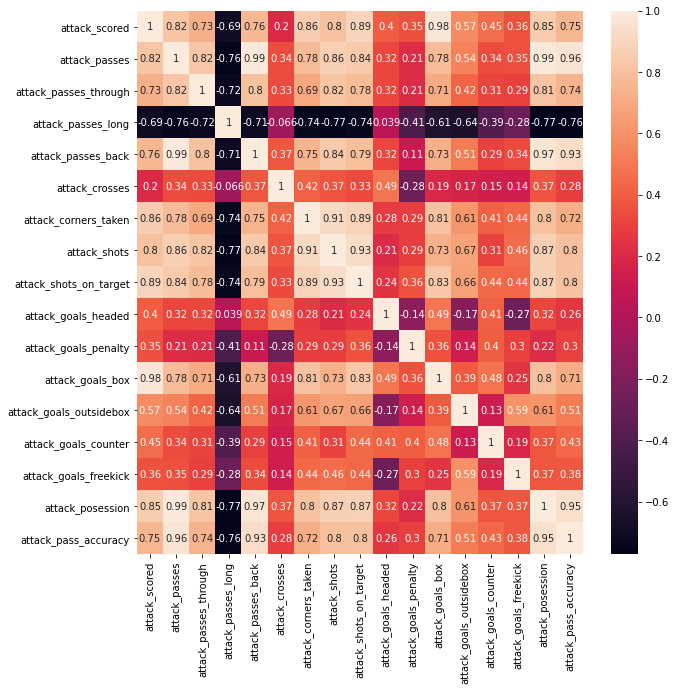

In [19]:
corelation = attack_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,
            annot=True)

In [20]:
# attack_passes_long column has relatively negative correlation compared to the others.
# Therefore, I change the value of this column as 1 - attack_passes_long in order to get better conclusion.
attack_data["attack_passes_long"] = 1 - attack_data["attack_passes_long"]
attack_data.corr()

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
attack_scored,1.000000,0.817732,0.725372,0.692815,0.764238,0.203544,0.859992,0.804922,0.889678,0.396272,0.354105,0.977570,0.573268,0.454484,0.359218,0.849823,0.751870
attack_passes,0.817732,1.000000,0.824348,0.756387,0.986540,0.336950,0.778956,0.863581,0.844993,0.321640,0.214261,0.780969,0.536665,0.339286,0.353208,0.987926,0.958513
attack_passes_through,0.725372,0.824348,1.000000,0.719131,0.800251,0.333154,0.692783,0.817177,0.777863,0.319733,0.206044,0.705298,0.424755,0.314547,0.287656,0.813384,0.741452
attack_passes_long,0.692815,0.756387,0.719131,1.000000,0.711326,0.066151,0.736721,0.771446,0.737761,-0.038654,0.414866,0.614405,0.640159,0.387463,0.281401,0.769474,0.759779
attack_passes_back,0.764238,0.986540,0.800251,0.711326,1.000000,0.370631,0.748911,0.841247,0.789096,0.320649,0.110160,0.727225,0.510180,0.287276,0.342375,0.965718,0.934385
attack_crosses,0.203544,0.336950,0.333154,0.066151,0.370631,1.000000,0.418022,0.370218,0.334369,0.486685,-0.275479,0.190848,0.172591,0.145297,0.141037,0.369968,0.283103
attack_corners_taken,0.859992,0.778956,0.692783,0.736721,0.748911,0.418022,1.000000,0.913899,0.887884,0.280340,0.285044,0.811066,0.614041,0.406392,0.444626,0.803268,0.717903
attack_shots,0.804922,0.863581,0.817177,0.771446,0.841247,0.370218,0.913899,1.000000,0.929259,0.208841,0.286392,0.733233,0.670405,0.305170,0.459303,0.865745,0.799261
attack_shots_on_target,0.889678,0.844993,0.777863,0.737761,0.789096,0.334369,0.887884,0.929259,1.000000,0.239350,0.357834,0.831344,0.658691,0.444413,0.438422,0.870274,0.801613
attack_goals_headed,0.396272,0.321640,0.319733,-0.038654,0.320649,0.486685,0.280340,0.208841,0.239350,1.000000,-0.137618,0.494860,-0.174978,0.411612,-0.269456,0.320640,0.256828


In [21]:
#Get the average attack value for every teams
attack_data["avg_attack"] = attack_data.mean(axis=1)
attack_data[["Team","avg_attack"]]

,Team,avg_attack
0,Manchester City,0.852937
1,Liverpool,0.704649
2,Chelsea,0.632101
3,Tottenham,0.584733
4,Arsenal,0.528769
5,Manchester United,0.529246
6,Wolverhampton,0.373354
7,Everton,0.430639
8,Leicester,0.542208
9,West Ham,0.359461


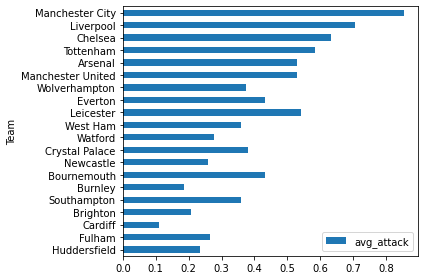

In [22]:
attack_data.plot.barh(x='Team',y='avg_attack').invert_yaxis()
plt.tight_layout()
plt.show()

#Question Number 4
####Which team has the best defence?

In [23]:
#Select the features related to the defences of team
# Get column names containing "conceeded" string
defence_columns = get_column_with_string("conceeded")

# Create dataframe about defence
defence_data = epl_data[['Team']]
defence_data = pd.concat([defence_data,pd.DataFrame(scaler.fit_transform(epl_data[defence_columns]),
                                              columns=defence_columns)],axis=1)
defence_data.sort_values('defence_goals_conceeded').head(10)

,Team,defence_goals_conceeded,defence_penalty_conceeded
1,Liverpool,0.000000,0.000000
0,Manchester City,0.016949,0.333333
2,Chelsea,0.288136,0.111111
3,Tottenham,0.288136,0.444444
6,Wolverhampton,0.406780,0.333333
7,Everton,0.406780,0.444444
8,Leicester,0.440678,0.444444
12,Newcastle,0.440678,0.666667
4,Arsenal,0.491525,0.666667
11,Crystal Palace,0.525424,0.444444


In [24]:
defence_data.corr()

,defence_goals_conceeded,defence_penalty_conceeded
defence_goals_conceeded,1.000000,0.585704
defence_penalty_conceeded,0.585704,1.000000


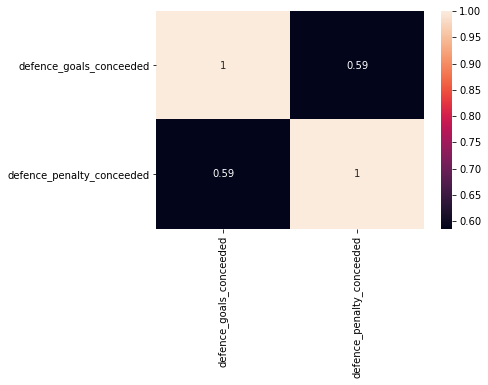

In [25]:
corelation = defence_data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,
            annot=True)

In [26]:
# Inverse the value
defence_data["avg_def"] = 1 - defence_data.mean(axis=1)
defence_data[["Team","avg_def"]].sort_values('avg_def',ascending=False)

,Team,avg_def
1,Liverpool,1.000000
0,Manchester City,0.824859
2,Chelsea,0.800377
3,Tottenham,0.633710
6,Wolverhampton,0.629944
7,Everton,0.574388
8,Leicester,0.557439
15,Southampton,0.524482
11,Crystal Palace,0.515066
9,West Ham,0.498117


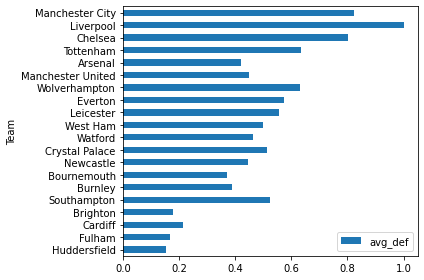

In [33]:
defence_data.plot.barh(x='Team',y='avg_def').invert_yaxis()
plt.tight_layout()
plt.show()

#Question Number 5
####Which team is good in the financial aspect?

In [27]:
#Select the features related to the financial aspect of team
# Get column names containing "finance" string
finance_columns = get_column_with_string("finance")

# Create dataframe about finance of team
finance_data = epl_data[['Team']]
finance_data = pd.concat([finance_data,pd.DataFrame(scaler.fit_transform(epl_data[finance_columns]),
                                              columns=finance_columns)],axis=1)
finance_data.head(10)

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,0.842105,0.974213,1.000000,1.000000
1,Liverpool,1.000000,1.000000,0.818286,0.860853
2,Chelsea,0.789474,0.885388,0.756197,0.729092
3,Tottenham,0.842105,0.871060,0.708012,0.713605
4,Arsenal,0.789474,0.816619,0.671573,0.648082
5,Manchester United,0.894737,0.822349,0.506640,0.513462
6,Wolverhampton,0.263158,0.547281,0.309584,0.352395
7,Everton,0.421053,0.573068,0.239584,0.235406
8,Leicester,0.263158,0.478512,0.216570,0.213248
9,West Ham,0.315789,0.464185,0.162056,0.161306


In [28]:
#Check the correlation of features
finance_data.corr()

,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
finance _live_games_televised,1.000000,0.946232,0.907909,0.915726
finance _tv_revenue,0.946232,1.000000,0.945133,0.948347
finance _team_market,0.907909,0.945133,1.000000,0.997373
finance _market_average,0.915726,0.948347,0.997373,1.000000


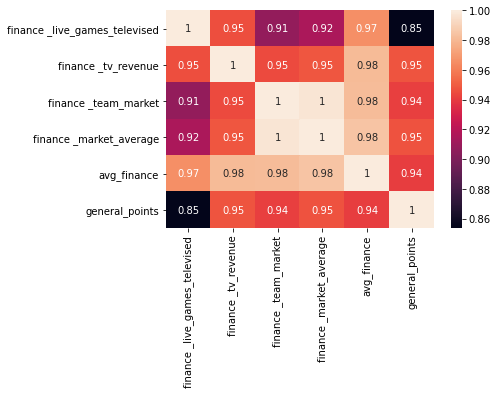

In [34]:
corelation = finance_data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,
            annot=True)

In [29]:
#To find the average of each finance column for every teams.
finance_data["avg_finance"] = finance_data.mean(axis=1)
finance_data[["Team","avg_finance"]].sort_values('avg_finance',ascending=False)

,Team,avg_finance
0,Manchester City,0.954080
1,Liverpool,0.919785
2,Chelsea,0.790038
3,Tottenham,0.783696
4,Arsenal,0.731437
5,Manchester United,0.684297
6,Wolverhampton,0.368104
7,Everton,0.367278
12,Newcastle,0.310509
8,Leicester,0.292872


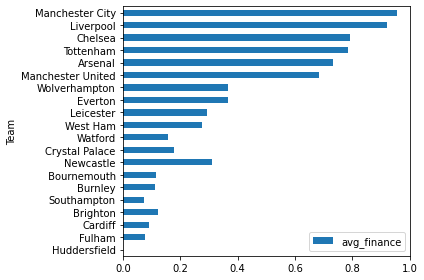

In [36]:
finance_data.plot.barh(x='Team',y='avg_finance').invert_yaxis()
plt.tight_layout()
plt.show()

#Question Number 6
####DO CREATIVITY

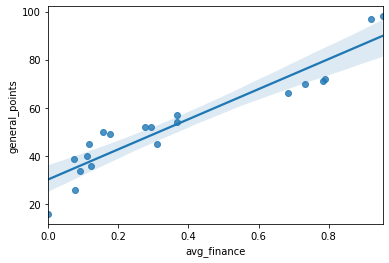

In [30]:
#To find the correlation of finance performance with team performance in terms of general point
finance_data['general_points'] = epl_data['general_points']
ax2 = sns.regplot(x='avg_finance', y='general_points', data=finance_data)

In [31]:
finance_data['avg_finance'].corr(finance_data['general_points'], method='pearson')

0.9409347354643064